Gunshot Example vs Non Gunshot Example
gunshot example link: https://www.youtube.com/watch?v=-gPM1IQBHkc
non gunshot example link: https://www.youtube.com/watch?v=HMp3VHakVKw

In [1]:
cd ../dataprocessing

In [22]:
# import statements
import audio_processing as ap

import functools
import os
import sys
from absl import logging

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import librosa

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.utils import np_utils
import sklearn
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [3]:
# set logging to print logging.INFO logs
logging.set_verbosity(logging.INFO)

In [4]:
# arguments for audio_processing
src_dir = 'example_src_dir'
dest_dir = 'example_dest_dir'
filename = 'visualize_features'
labels = ['Gunshot, gunfire']
features_to_extract = ['chroma_stft',
                       'chroma_cqt',
                       'chroma_cens',
                       'melspectrogram',
                       'mfcc',
                       'rms',
                       'spectral_centroid',
                       'spectral_bandwidth',
                       'spectral_contrast',
                       'spectral_flatness',
                       'spectral_rolloff',
                       'poly_features',
                       'tonnetz',
                       'zero_crossing_rate'
]

In [5]:
# Import the dataset
df = ap.output_df(src_dir, dest_dir, filename, labels, features_to_extract, False, redo=True)

INFO:absl:The set has 2 examples


downloading video
[youtube] -gPM1IQBHkc: Downloading webpage
[download] Destination: example_dest_dir/tmp/-gPM1IQBHkc.m4a
[download] 100% of 922.89KiB in 00:0019MiB/s ETA 00:001
[ffmpeg] Correcting container in "example_dest_dir/tmp/-gPM1IQBHkc.m4a"
[ffmpeg] Post-process file example_dest_dir/tmp/-gPM1IQBHkc.m4a exists, skipping


INFO:absl:Download Complete
INFO:absl:chopped_audio


downloading video
[youtube] HMp3VHakVKw: Downloading webpage
[download] Destination: example_dest_dir/tmp/HMp3VHakVKw.webm
[download] 100% of 2.29MiB in 00:0027MiB/s ETA 00:0002
[ffmpeg] Destination: example_dest_dir/tmp/HMp3VHakVKw.opus
Deleting original file example_dest_dir/tmp/HMp3VHakVKw.webm (pass -k to keep)


INFO:absl:Download Complete
INFO:absl:chopped_audio
INFO:absl:2 examples successfully downloaded
INFO:absl:Time to download: 4.436887
INFO:absl:extracted features
INFO:absl:extracted features
INFO:absl:extracted features
INFO:absl:extracted features
INFO:absl:extracted features
INFO:absl:extracted features
INFO:absl:extracted features
INFO:absl:extracted features
INFO:absl:extracted features
INFO:absl:extracted features
INFO:absl:extracted features
INFO:absl:extracted features
INFO:absl:extracted features
INFO:absl:extracted features
INFO:absl:(0, 12.692205)
INFO:absl:extracted features
INFO:absl:extracted features
INFO:absl:extracted features
INFO:absl:extracted features
INFO:absl:extracted features
INFO:absl:extracted features
INFO:absl:extracted features
INFO:absl:extracted features
INFO:absl:extracted features
INFO:absl:extracted features
INFO:absl:extracted features
INFO:absl:extracted features
INFO:absl:extracted features
INFO:absl:extracted features
INFO:absl:(1, 20.559427)
INFO

In [16]:
df.head()

,label,chroma_stft,chroma_cqt,chroma_cens,melspectrogram,mfcc,rms,spectral_centroid,spectral_bandwidth,spectral_contrast,spectral_flatness,spectral_rolloff,poly_features,tonnetz,zero_crossing_rate
0,1,"[[0.0, 0.0, 0.0, 0.0, 0.7836249, 0.54285324, 0...","[[0.09258408397838813, 0.29281937134384245, 0....","[[0.22369786432146194, 0.22729126207787814, 0....","[[0.0, 0.0, 0.0, 0.0, 0.0016109014, 0.25045666...","[[-657.38403, -657.38403, -657.38403, -657.384...","[[0.0, 0.0, 0.0, 0.0, 0.0046520517, 0.03861855...","[[0.0, 0.0, 0.0, 0.0, 2015.3045826157543, 2313...","[[0.0, 0.0, 0.0, 0.0, 2615.098141918859, 2695....","[[10.014450030697795, 10.014450030697795, 10.0...","[[1.0000007, 1.0000007, 1.0000007, 1.0000007, ...","[[0.0, 0.0, 0.0, 0.0, 5081.8359375, 5663.23242...","[[0.0, 0.0, 0.0, 0.0, -1.6424078469954708e-06,...","[[-0.28102570774648, -0.13740358999520996, -0....","[[0.0582312925170068, 0.060045351473922905, 0...."
1,0,"[[0.23179506, 0.24008964, 0.19523025, 0.307452...","[[0.4335042444372439, 0.5997672061197934, 0.36...","[[0.2991746992028136, 0.303567161079119, 0.307...","[[0.019795934, 0.01764908, 0.014517155, 0.0464...","[[-393.32425, -358.65057, -305.81363, -292.944...","[[0.024666155, 0.03652693, 0.04397792, 0.05069...","[[632.6626973078273, 697.5850027667651, 708.91...","[[1206.4440610764414, 1120.9771299846254, 1004...","[[13.59012782288142, 18.6156827850104, 17.3921...","[[0.00010328917, 0.00030978382, 0.00022840177,...","[[764.4287109375, 861.328125, 968.994140625, 9...","[[-8.54170786207522e-05, -8.969041815871419e-0...","[[-0.04785370478493173, 0.016290546483931523, ...","[[0.020045351473922904, 0.02145124716553288, 0..."


In [40]:
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

In [41]:
def view_spectral_centroid(feature):
    frames = range(len(feature))
    t = librosa.frames_to_time(frames)
    normalized_feature = normalize(feature)
#     print(normalized_feature)
    plt.plot(t, feature, color='r')

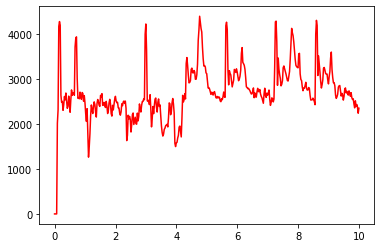

In [47]:
# gunshot spectral_centroid
view_spectral_centroid(df['spectral_centroid'][0][0])

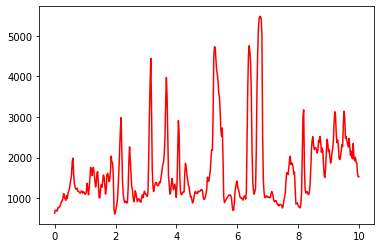

In [48]:
# gunshot spectral_centroid
view_spectral_centroid(df['spectral_centroid'][1][0])